## Initialize python imports, notebook window width,  and graphics window position
Executed automatically on start or restart.

In [1]:
%gui osx
import random as rand
import numpy as np
import genelife as g

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

# 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))     # sets input cells to use full window width

from os import environ
environ['SDL_VIDEO_WINDOW_POS'] = "%d,%d" % (1000,32)   # set position of pygame (SDL) video window (x,y) pixel coords, values work well on iMac

import time

from bayespy.nodes import Categorical, Dirichlet
from bayespy.nodes import Beta
from bayespy.nodes import Mixture, Bernoulli
from bayespy.inference import VB  # variational Bayes inference engine
import bayespy.plot as bpplt

Running with SDL version 2.0.9.


## Selection 11 Distance distinguishing LUT encoded by gene with variable length encoding

In [2]:
# 11
#  selection=11 LUT with appropriate parameters for survival
#  this case uses the genes to encode the se (number of live edge-centred sites) and s dept rule tables for birth and survival
#  a variable length encoding is used in the gene with 4+4 bits, 4-bits for the survival and birth s value as in 8, and 4 bits for the se value
#  there are 1,2,3,4,5,4,3,2,1 configurations of se for s=0-8. Only 19 cases s=2-6 are lut allowed non-zero.
#  birth is determined by the and of the live neighbour genes (and 19 bits of overwritemask) ie genecode
#  survival is determined the and of the live neighbour genes (and 19 bits of survivalmask) ie genecode
#  ncoding not used : only space for 1 bit per lut entry
#  this example starts with only allowing GoL configurations : extend by adding more bits to survival and birth masks
g.nrun=1; g.ndisp=1000; g.nskip=0; g.niter=1;# simulation time stepping parameters
g.nhist = 0                                  # set to n to turn on histogram configurations every nth step
g.nstat = 0                                  # set to n to turn on statistics trace every nth step
g.rulemod = g.runparams[0] = 1               # 0,1 whether to allow GoL rule modifications
                                             # with rulemod 1 2-live-nb birth, 3-live-nb non-birth & non-survival possible
g.repscheme = g.runparams[1] = 0x0610        # repscheme bit 3 (val 0x8) determines whether random choice of ancestor amongst live neighbours
                                             # repscheme mod 8 i.e. 0-7 determines selection scheme based on gene
                                             # 0 minimum gene as value  # 1 maximum gene as value
                                             # 2 minimum number of ones # 3 maximum number of ones
                                             # 4 neutral selection # 5 neutral but different selection
                                             # 6 penalty function -1 for a survival rule -2 for a birth rule  # 7 not allowed 
g.selection     = g.runparams[2] = 11        # fitness for 2 live neighbor rule : 0-6 see subgenelife.c code
g.overwritemask = g.runparams[3] = 0xffff
g.overwritemask = g.runparams[3] = 0x00
g.birthmask    = g.runparams[7] = 0x000001e0 # for selection=10-13 this is the GoL birth mask
g.birthmask    = g.runparams[7] = 0x000001e2 # for selection=10-13 this is the GoL birth mask
g.birthmask    = g.runparams[7] = 0x000001e2 # for selection=10-13 this is the GoL birth mask
g.birthmask    = g.runparams[4] = 0x0 # for selection=10-11 this is the GoL survival mask
g.birthmask    = g.runparams[4] = 0x007fffff # for selection=10-11 this is the GoL survival mask
g.survivalmask = g.runparams[4] = 0x000001fc # for selection=10-11 this is the GoL survival mask
g.survivalmask = g.runparams[4] = 0x00000 # for selection=10-11 this is the GoL survival mask
g.survivalmask = g.runparams[4] = 0x007fffff # for selection=10-11 this is the GoL survival mask



g.colorfunction = g.runparams[5] = 0         # color function 0(hash), ≥1(fnal), 2 nongulstate or color gol planes, 3 notgolrul yellow
                                             # 4 activities 5 genealogy steps 6 genealogy temporal 7 activity scaled colors
g.initfield = g.runparams[6] = 100           # 1 init via 32x32 genepat.dat, n>1 init via nxn rand array
g.nlog2pmut = g.simparams[0] = 8             # log2 gene mutation probability (0 or >56 means no mutation)
g.initial1density = g.simparams[1] =  16384  # initial 1 density in GOL state
                                             # 16384 = nearest to half of guaranteed C rand max value 32767 = 2**15 - 1
g.initialrdensity = g.simparams[2] = 0       # initial density of random genes
g.ncoding = g.simparams[3] = 1               # for selection 10, non zero value means grow plane community from 0
                                             # otherwise (selection<10) no of bits used to encode valid connection functions 1-16
                                             # for selection==8, lut, ncoding 1,2,3 bits per lut entry : 0 implies 3.
g.startgenechoice = g.simparams[4] = 8       # initialize genes to startgene number 0-8 : 8 is random choice of 0-7

g.genelife.initialize_planes(g.npoffsets)
g.genelife.set_seed(2)
g.genelife.initialize(g.runparams,g.simparams)
g.framenr = 0
g.cnt=0
g.show0()
# step()
g.run(g.nrun, g.ndisp, g.nskip, g.niter, g.nhist, g.nstat, False)

/Users/n/Projects/genelife/fastgenegol/genelifepy/genelife.py:388: ExperimentalWarning: 'pixels2d' is in an experimental state.
  cgrid=sdl2.ext.pixels2d(surface)


### Old 5.2, scissors paper well rock

## get genealogy data

In [4]:
gdepth = g.genelife.get_genealogydepth()
nspecies = g.genelife.get_nspecies()
gdat = np.zeros(gdepth*nspecies,dtype=g.genelife.genedtype)
mxdepth = g.genelife.get_genealogies(gdat)

In [5]:
len(gdat)

15968

In [6]:
gdat.shape = (nspecies,gdepth)

In [7]:
nspecies

998

In [14]:
idx = 50; 
gdat[idx]

array([(  7, 191, 330,  -1,   5686, 0, 10971120536075058983, 10970839061098348327),
       (  0, 176, 290, 293,  11761, 2, 10970839061098348327, 10394378308794924839),
       (  0,  55, 298, 300,  12754, 3, 10394378308794924839, 10394378308727815975),
       (  0,  41,  66,  68,    275, 2, 10394378308727815975, 10376363910218333991),
       ( 73,  39, 330,  44,   2402, 2, 10376363910218333991,  1152991873363558183),
       (  0,  17,  62,  64,    439, 1,  1152991873363558183,  1152921504619380519),
       (  0,   2,  81,  95,   4167, 1,  1152921504619380519,             12533543),
       (354,   0, 330,  -1, 104404, 0,             12533543, 18364758544493064720),
       (  0,   0,   0,   0,      0, 0, 18364758544493064720,                    0),
       (  0,   0,   0,   0,      0, 0, 18364758544493064720,                    0),
       (  0,   0,   0,   0,      0, 0, 18364758544493064720,                    0),
       (  0,   0,   0,   0,      0, 0, 18364758544493064720,                

In [15]:
gdat = [[x for x in gdat[i] if x['gene']!= 0xfedcba9876543210] for i in range(len(gdat))]

In [19]:
gdat[50]

[(7, 191, 330, -1, 5686, 0, 10971120536075058983, 10970839061098348327),
 (0, 176, 290, 293, 11761, 2, 10970839061098348327, 10394378308794924839),
 (0, 55, 298, 300, 12754, 3, 10394378308794924839, 10394378308727815975),
 (0, 41, 66, 68, 275, 2, 10394378308727815975, 10376363910218333991),
 (73, 39, 330, 44, 2402, 2, 10376363910218333991, 1152991873363558183),
 (0, 17, 62, 64, 439, 1, 1152991873363558183, 1152921504619380519),
 (0, 2, 81, 95, 4167, 1, 1152921504619380519, 12533543),
 (354, 0, 330, -1, 104404, 0, 12533543, 18364758544493064720)]

In [18]:
gdat[50][-1:]

[(354, 0, 330, -1, 104404, 0, 12533543, 18364758544493064720)]

Text(0,0.5,'size of subpopulation')

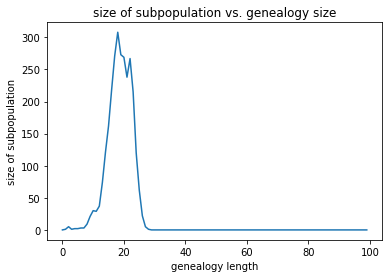

In [10]:

food = [len([i for i in range(len(gdat)) if len(gdat[i])==j]) for j in range(100)]
plt.plot(food);
plt.title('size of subpopulation vs. genealogy size')
plt.xlabel('genealogy length')
plt.ylabel('size of subpopulation')

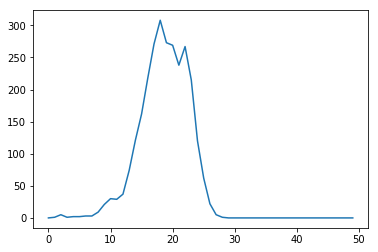

In [15]:
plt.plot(food[:50]);

In [24]:
foo=food; 
tot = sum(foo)
foo = [x/tot for x in foo]
sum([i*foo[i] for i in range(len(foo))])

18.659804983748643

In [20]:
sum(foo)

1.0

In [36]:
g.genelife.get_curtime()

1922

In [39]:
heads = [gdat[i][0] for i in range(len(gdat)) if len(gdat[i])>0]
#heads2 = [gdat[i][2] for i in range(1,len(gdat)) if len(gdat[i])>0]
tails = [gdat[i][len(gdat[i])-1] for i in range(len(gdat)) if len(gdat[i])>0]

In [42]:
uheads = list(set(heads))
utails = list(set(tails))

In [41]:
[hex(x) for x in utails]

['0xbf3f27']

## Mean genealogy length vs. time

In [ ]:
g.nrun=1; g.ndisp=1000; g.nskip=0; g.niter=1;# simulation time stepping parameters
g.nhist = 0                                  # set to n to turn on histogram configurations every nth step
g.nstat = 0                                  # set to n to turn on statistics trace every nth step
g.genelife.initialize(g.runparams,g.simparams)


In [40]:
gmn = []
now=time.time()
for i in range(50):
    g.genelife.genelife_update(100,0,0)
    gdepth = g.genelife.get_genealogydepth()
    nspecies = g.genelife.get_nspecies()
    gdat = np.zeros(gdepth*nspecies,dtype=g.genelife.c_uint64)
    mxdepth = g.genelife.get_genealogies(gdat)
    gdat.shape = (nspecies,gdepth)
    gdat = [[x for x in gdat[i] if x!= 0xfedcba9876543210] for i in range(len(gdat))]
    food = [len([i for i in range(len(gdat)) if len(gdat[i])==j]) for j in range(100)]
    tot = sum(food)
    food = [x/tot for x in food]
    gmn.append(sum([i*food[i] for i in range(len(food))]))    
    print(i,round(time.time()-now,3))
    now = time.time()


0 8.805
1 9.202
2 8.752
3 8.824
4 8.905
5 9.036
6 10.985
7 13.257
8 11.106
9 10.853
10 10.211
11 10.398
12 10.042
13 10.289
14 9.925
15 10.056
16 10.308
17 10.206
18 10.395
19 10.665
20 10.494
21 10.888
22 11.109
23 10.894
24 11.084
25 11.134
26 11.234
27 11.408
28 11.369
29 11.507
30 11.736
31 11.894
32 11.777
33 12.01
34 11.895
35 12.125
36 12.159
37 12.632
38 12.483
39 12.638
40 12.6
41 12.7
42 13.128
43 12.765
44 13.362
45 13.245
46 15.033
47 13.396
48 14.41
49 13.444


In [43]:
import seaborn as sb
sb.set()

Text(0,0.5,'mean genealogy length')

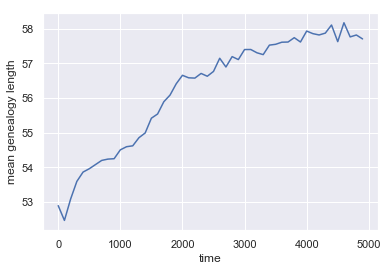

In [44]:
plt.plot(range(0,5000,100),gmn);
plt.xlabel('time')
plt.ylabel('mean genealogy length')